In [1]:
import numpy as np
import matplotlib.pyplot as plt
from chemcompute import chemcompute
from jupyter_jsmol import JsmolView

## Downloading an output file from ChemCompute

There is a library called `cclib` which can be used to parse quantum chemistry output files.  We will download an output file from a water optimization calculation and parse it.  This will create a python data object.  We can then access different specific data using the attributes.  The list of properties you can access can be found in the cclib documentation at https://cclib.github.io/data.html.  In general to access one of the attributes the syntax is `data_object.attribute_name`.

In [2]:
# This output is from a water optimization
job = chemcompute.download(1221668)

200


In [3]:
# This didn't work
view1 = JsmolView.from_file(job, inline=False) 
#view1

In [4]:
# Parsing the output file
data = chemcompute.parse(job)

We can now access lots of different information from the data from the job output.

In [5]:
# We can access the SCF energies.  
scf_energies = data.scfenergies
print(scf_energies)

[-2077.48816879 -2078.15868367 -2078.14940048 -2078.16813887
 -2078.17207255 -2078.18320823 -2078.18323404 -2078.18242758
 -2078.18251867 -2078.18323406 -2078.18254805 -2078.18316184
 -2078.18323405 -2078.18309423 -2078.182612   -2078.18323404
 -2078.1824542  -2078.18254437 -2078.18323406 -2078.18251746
 -2078.1831632  -2078.18323405 -2078.18309881 -2078.18258552
 -2078.18323404]


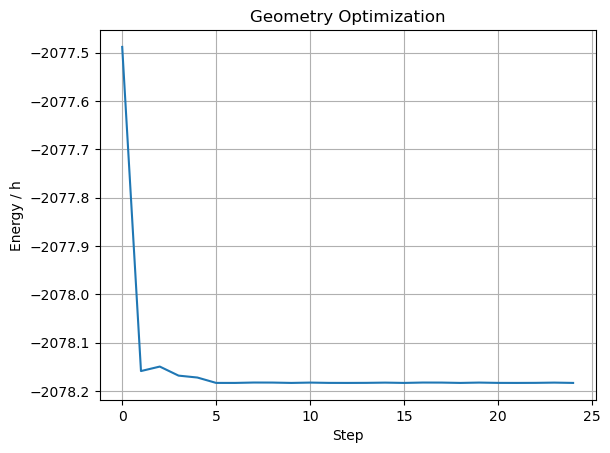

In [6]:
plt.plot(scf_energies)
plt.xlabel("Step")
plt.ylabel("Energy / h")
plt.title("Geometry Optimization")
plt.grid(True)
plt.show()


We can also look at the atomic coordinates as the geometry optimization converges.

In [7]:
# how do the atoms move as geometry converges
print(data.atomcoords)

[[[ 0.          0.          0.        ]
  [ 1.1         0.          0.        ]
  [-0.37622     1.03366     0.        ]]

 [[ 0.01563611  0.0223293   0.        ]
  [ 1.00228392  0.05178229 -0.        ]
  [-0.29414003  0.95954841  0.        ]]

 [[-0.00489003 -0.00698492  0.        ]
  [ 0.95962173  0.10349811 -0.        ]
  [-0.2309517   0.93714681  0.        ]]

 [[ 0.01506005  0.0215058   0.        ]
  [ 0.96553967  0.07812409 -0.        ]
  [-0.25681971  0.93403011  0.        ]]

 [[ 0.01491664  0.02130125 -0.        ]
  [ 0.9949604   0.057676   -0.        ]
  [-0.28609703  0.95468274  0.        ]]

 [[ 0.011934    0.01704191 -0.        ]
  [ 0.98014478  0.07122401 -0.        ]
  [-0.26829878  0.94539408  0.        ]]

 [[ 0.01222008  0.01745013 -0.        ]
  [ 0.97969688  0.07123326 -0.        ]
  [-0.26813696  0.9449766   0.        ]]]


This is a data structure is a list of lists.  There is one set of coordinates for each frame.  Wihtin each frame there is a list of coordinates for each atom. We use square bracket notation to select particular frame number or a particular atom within a particular frame number. 

In [8]:
#Print the coordinates for the first frame of the optimization for all atoms
print(f'The coordinates for the first frame:')
print(data.atomcoords[0])

#Print the coordinates for the first frame, first atom
print(f'The coordinates for the first atom in the first frame')
print(data.atomcoords[0][0])

The coordinates for the first frame:
[[ 0.       0.       0.     ]
 [ 1.1      0.       0.     ]
 [-0.37622  1.03366  0.     ]]
The coordinates for the first atom in the first frame
[0. 0. 0.]


Looking at this list, we know water has three atoms, so we have three coordinates for each atom at each timestep.  But now we need to know which atom is which.  We can use the attribute `data.atomnos` which will give us an array of the atomic numbers of the atoms. 

In [9]:
# which atom is which
# result:  atom 0: oxygen    atom 1: hydrogen    atom 2: hydrogen
data.atomnos

array([8, 1, 1], dtype=int32)

So oxygen is atom 0, hydrogen is atom 1, and hydrogen is atom2.

### Exercise:  
Use the square bracket notation shown above to select the coordinates for the oxygen (atom 0) at the beginning of the simluation and at the end of the simluation.  Calculate how much the oxygen atom moved over the course of the optimization.  You may need to recall that the distance formula is $ D = \sqrt { \left (x_1- x_2 \right) ^ 2 + \left (y_1- y _2 \right) ^ 2 + \left (z_1- z_2 \right) ^ 2 } $

The function in numpy to take the square root is `np.sqrt`.

In [10]:
# Your code goes here
oxygen_start = data.atomcoords[0][0]
oxygen_final = data.atomcoords[-1][0]
print(f'The starting position of the oxygen is {oxygen_start}.  The final position for the oxygen is {oxygen_final}.')

distance_o = np.sqrt((oxygen_final[0]-oxygen_start[0])**2 + (oxygen_final[1]-oxygen_start[1])**2 + (oxygen_final[2]-oxygen_start[2])**2)
print(f'The distance moved by the oxygen is {distance_o:4f} angstroms.')

The starting position of the oxygen is [0. 0. 0.].  The final position for the oxygen is [ 0.01222008  0.01745013 -0.        ].
The distance moved by the oxygen is 0.021303 angstroms.


### Exercise: Writing a distance function
Now suppose you wanted to measure how the O-H bond length changes over the course of the simluation.  You would need to use the distance formula a bunch of times.  Rather than copying and pasting your code, write a function called `distance` that calculate the distance between two atoms.  Make the input of your function two lists of the atomic coordinates and the return the distance between the points.  Check your function by calculating the distance the oxygen atom moved during the optimization and comparing to your manual calculation above.

In [11]:
# write a function to find the distance between two atoms
def distance(atom1,atom2):
    #Fill in tthe function here
    deltax = atom1[0] - atom2[0]
    deltay = atom1[1] - atom2[1]
    deltaz = atom1[2] - atom2[2]
    d = (deltax**2 + deltay**2 + deltaz**2)**(0.5)
    return d

In [12]:
dist_oxy = distance(data.atomcoords[-1][0], data.atomcoords[0][0])
print(dist_oxy)

0.02130345949017131


Now to track the O-H distance across the simulation, we need to write a for loop that counts over the frames and then use our distance formula to measure the distance between the oxygen (atom 0) and one of the hydrogen atoms.

In [13]:
# how many geometry optimzation frames are there?  (includes starting geometry #0)
num_frames = len(data.atomcoords)
# Blank list to store the distances
OHdistances = []
for frame in range(0,num_frames):
    OHdist = distance(data.atomcoords[frame][0], data.atomcoords[frame][1])
    OHdistances.append(OHdist)
print(OHdistances)

[1.1, 0.9870873267843467, 0.9708189508310623, 0.9521644501814082, 0.980718560334297, 0.969725640445507, 0.9689705878188803]


### Exercise
Plot the bond distance as a function of geometry optimization step.

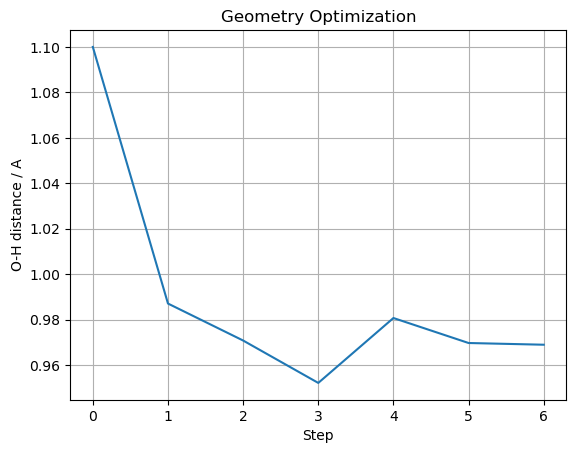

In [16]:
# Your code goes here
# Make a graph
plt.plot(OHdistances)
plt.xlabel("Step")
plt.ylabel("O-H distance / A")
plt.title("Geometry Optimization")
plt.grid(True)
plt.show()

In [ ]:
# Maybe take this out?

# compute angle between H-O-H using law of cosines
from math import acos
def angle(atom1,atom2,atom3):
    a = distance(atom1,atom2)
    b = distance(atom3,atom2)
    c = distance(atom1,atom3)
    
    cosTheta = (a**2 + b**2 - c**2) / (2*a*b)
    theta = acos(cosTheta)
    return theta * 360 / (2*3.14159)
    
    

In [ ]:
# Maybe take this out?

# calculate H-O-H bond bond angle (initial)
# remember:  atom 0 is O, atom 1 is H, and atom 2 is H
frame = 0
angle(data.atomcoords[frame][1], data.atomcoords[frame][0], data.atomcoords[frame][2])

In [ ]:
# Maybe take this out?

# HOH bond angle as the geometry converges
HOHangles = []
for frame in range(0,len(data.atomcoords)):
    HOHangles.append(angle(data.atomcoords[frame][1], data.atomcoords[frame][0], data.atomcoords[frame][2]))
plt.plot(HOHangles)
plt.xlabel("Step")
plt.ylabel("H-O-H bond angle / degrees")
plt.title("Geometry Optimization")
plt.grid(True)
plt.show()

We can also use `cclib` to get theromdynamic quantities like the ethalpy and the entropy.  Consult the cclib documentation[https://cclib.github.io/data.html] for the units for each quantity.

In [21]:
#enthalpy (hartree / particle)
#entropy (hartree/(particle kelvin)
# 1 h = 2625.5 kJ/mol   https://cccbdb.nist.gov/hartreex.asp
h2o_enthalpy =  data.enthalpy * 2625.5
h2o_entropy = data.entropy * 2625.5
print(f'The enthalpy of water is {h2o_enthalpy:.2f} and the entropy is {h2o_entropy:.2f} in kJ/mole.')


The enthalpy of water is -200448.79 and the entropy is 0.19 in kJ/mole.


We can also access information about the IR spectra.  We will, of course, have an intensity for each frequency.

In [22]:
# IR frequencies (cm^-1)
print(data.vibfreqs)
# IR intensities (km / mol)
print (data.vibirs)

[1712.5  3724.8  3846.75]
[75.62166075  1.64414205 19.12503555]


To plot an IR spectra, we need to plot a vertical line for each IR frequency where the height of the line corresponds to the calcualted intensity.  Note that this doesn't look exactly like an experimental IR spectra because there is no line broadening; we will discuss this more later.

To make a vertical line plot, we use a function from matplotlib called `plt.vlines()`.  The syntax for using this function is `plt.vlines(x, ymin, ymax)`

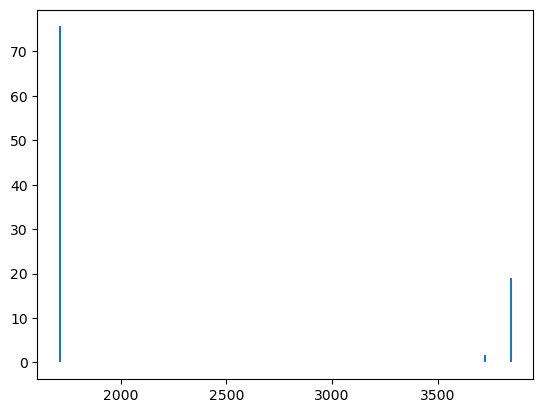

In [27]:
# plot IR spectra (no linewidth from GAMESS, just infinitely thin lines)
num_freqs = len(data.vibfreqs)
for i in range(num_freqs):
    freq = data.vibfreqs[i]
    inten = data.vibirs[i]
    plt.vlines(freq,0,inten)


In [ ]:
# this is not working
# animate vibrations
view1.script("frame last; vibration on;")
# scroll up to the JSmol window

### Exercise
You can access the molecular orbital energies from the data object using the syntax `data.noenergies[0]`.  (The 0 is there because the output is an array and the energies are element 0 of that array.)  There is another matplotlib function to plot horizontal lines called `plt.hlines`.  Make an MO orbital diagram where you plot a horizontal line for each MO energy level.  If you need help figuring out the inputs of the `plt.hlines` function you can google it or use the `help()` function.  

[-520.67896838  -27.05355902  -13.97304622  -10.03283767   -7.82871548
    1.78506686    4.11164028   21.10787138   23.51335782   24.33242051
   24.44670833   29.08897062   32.56658563   47.14644574   47.61992384]


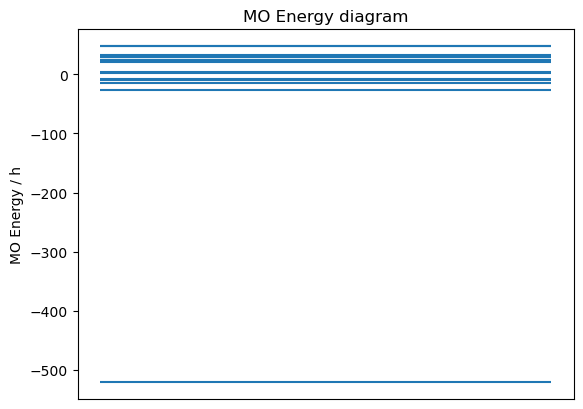

In [31]:
# Your code goes here

# Get the MO energies
moenergy_list = data.moenergies[0]
print(moenergy_list)
for energy in moenergy_list:
    plt.hlines(energy, 0, 1)
plt.title("MO Energy diagram")
plt.ylabel("MO Energy / h")
plt.xticks([])
plt.show()